# Introduction to PyTorch

In [2]:
# We start with basic torch
import torch
import matplotlib.pyplot as plt
torch.set_warn_always(False)
print(torch.__version__)

2.4.1


In [3]:
'''
with open(torch.__file__,'r') as f:
    torch_code = f.read()
    print(torch_code)
'''

"\nwith open(torch.__file__,'r') as f:\n    torch_code = f.read()\n    print(torch_code)\n"

In [4]:
type(torch.tensor)

builtin_function_or_method

## Scalar Tensor

In [5]:
# Scalar Tensor
x = torch.tensor(9)
print(x, x.shape, x.ndim)

tensor(9) torch.Size([]) 0


In [6]:
x.item()

9

In [7]:
print(x.storage())

 9
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 1]


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13340\3799332687.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(x.storage())


## 1D Tensor

In [8]:
# Vector Tensor
x = torch.tensor([1, 2, 3, 4, 5])
print(x, x.shape, x.ndim)

tensor([1, 2, 3, 4, 5]) torch.Size([5]) 1


In [9]:
x[0]

tensor(1)

In [10]:
print(x.storage(), x.stride())

 1
 2
 3
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 5] (1,)


## 2D Tensor

In [11]:
# 2D Tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x, x.shape, x.ndim)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) torch.Size([3, 3]) 2


In [12]:
x[0]
# Whenever you index, you loose a dimension

tensor([1, 2, 3])

## Random Tensors

In [13]:
x = torch.randint(0, 3, size = (2,), generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)

tensor([0, 2]) torch.Size([2]) 1


In [14]:
x = torch.randint(0, 3, size = (2, 3), generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)
print(x.stride()) # Stride is the number of elements to skip to get to the next element in the current dimension
x.storage() # Storage follows row major order

tensor([[0, 2, 1],
        [1, 0, 2]]) torch.Size([2, 3]) 2
(3, 1)


 0
 2
 1
 1
 0
 2
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 6]

In [15]:
torch.sum(x, dim = 0) # Column wise sum
# Also based on the stride, the sum is calculated

tensor([1, 2, 3])

## Big Tensor

In [16]:
# 2 x 2 x 3 x 2 tensor
x = torch.randint(0, 3, size = (2, 2, 3, 2), generator=torch.manual_seed(42))
print(x, x.shape, x.ndim)
print(x.stride())

tensor([[[[0, 2],
          [1, 1],
          [0, 2]],

         [[1, 2],
          [1, 2],
          [1, 1]]],


        [[[2, 0],
          [0, 1],
          [2, 1]],

         [[0, 1],
          [1, 2],
          [1, 2]]]]) torch.Size([2, 2, 3, 2]) 4
(12, 6, 2, 1)


In [17]:
# We call the 'sum' a reduction operation as it reduces the dimensionality of the tensor
y = torch.sum(x, dim = 0) # 2 x 3 x 2
print(y, y.shape, y.ndim)
print(y.stride())

tensor([[[2, 2],
         [1, 2],
         [2, 3]],

        [[1, 3],
         [2, 4],
         [2, 3]]]) torch.Size([2, 3, 2]) 3
(6, 2, 1)


## Autograds

In [18]:
x = torch.tensor(1.0, requires_grad = True)
print(x)

tensor(1., requires_grad=True)


In [19]:
y = torch.sigmoid(x)
print(y)

tensor(0.7311, grad_fn=<SigmoidBackward0>)


In [20]:
z = 2*y
print(z)

tensor(1.4621, grad_fn=<MulBackward0>)


In [21]:
# Think of these as a computational graph
print(x.is_leaf, y.is_leaf, z.is_leaf)

True False False


In [22]:
# z.backward(), will create a graph and calculate the gradients
# Beware: Calling backward multiple times will throw an error
z.backward()
print("The gradient of x is", x.grad)

The gradient of x is tensor(0.3932)


In [23]:
# It is possible to use z.backward() multiple times
x = torch.tensor(1.0, requires_grad = True)
y = torch.sigmoid(x)
z = 2*y

In [24]:
z.backward(retain_graph=True) # This way we can call backward multiple times
print("The gradient of x is", x.grad) # but the gradients will accumulate, i.e., they will be added

The gradient of x is tensor(0.3932)


## Hooks
One way to store gradients for visualizing and debugging are Hooks.

There are two types of hooks: Tensor and nn.Module

Tensor hooks will be called when .backward is called from a tensor in th computation graph.

Module level hooks can be executed when both forward and backward get called.

In [25]:
# Define the graph again
x = torch.tensor(1.0, requires_grad = True)
y = torch.sigmoid(x)
z = 2*y

In [26]:
# Make a hook
def y_hook(grad):
    print("The gradient of y is", grad)

In [27]:
# register the hook
y.register_hook(y_hook)

In [28]:
# Now, we can visualize the gradient of y
z.backward()
print("The gradient of x is", x.grad)

The gradient of y is tensor(2.)
The gradient of x is tensor(0.3932)


## Creating a single sigmoid neuron

In [29]:
# This is how we will define the model
x = torch.linspace(-1.0, 1.0, 10).reshape(10, 1)
w = torch.tensor([0.2])
b = torch.tensor([1.0])
a = w*x + b
y = 1/(1 + torch.exp(-a))

In [30]:
y

tensor([[0.6900],
        [0.6994],
        [0.7087],
        [0.7178],
        [0.7267],
        [0.7354],
        [0.7440],
        [0.7523],
        [0.7605],
        [0.7685]])

The final weights are tensor([[0.2000]], requires_grad=True)
The final biases are tensor([[1.0000]], requires_grad=True)


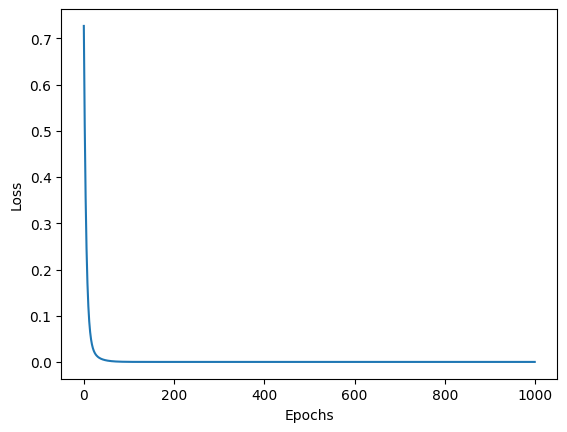

In [31]:
# Now, let's see how we train the model
# Initialize the weights and biases
w = torch.randn(size=(1,1), requires_grad=True) # leaf tensor
b = torch.zeros(size=(1,1), requires_grad=True) # leaf tensor
eta = torch.tensor(0.1) # leaf scalar but won't get grad
loss = []
epoch = 1000

for i in range(epoch):
    # forward pass
    a = w*x + b
    y_hat = 1/(1 + torch.exp(-a))
    
    # compute the loss
    L = torch.sum(torch.pow(y - y_hat, 2), dim=0)
    loss.append(L.detach().numpy()) # We need to detach because L is a leaf tensor, can also use L.item()
    
    # backward pass
    L.backward()
    #print("The gradient of w is", w.grad)
    #print("The gradient of b is", b.grad)

    # update the weights
    with torch.no_grad(): # If this is not there, then we will get an error because w and b become non-leaf tensors
        w -= eta*w.grad
        b -= eta*b.grad
    
    # zero the gradients, otherwise they will accumulate
    w.grad.zero_()
    b.grad.zero_()

# Final weights and biases
print("The final weights are", w) # Actual weight is 0.2
print("The final biases are", b) # Actual bias is 1.0

# Let's see the loss
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Actual weights are tensor([[-1.6898, -0.9890,  0.9580,  1.3221,  0.8172, -0.7658, -0.7506,  1.3525,
          0.6863, -0.3278]])


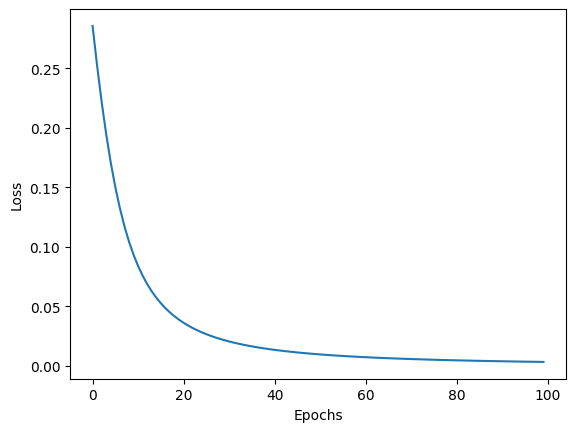

In [32]:
# Data Generation
x = torch.linspace(-1.0, 1.0, 10).reshape(10, 1)
w = torch.randn(size=(1,10))
print("Actual weights are", w)
a = torch.matmul(w,x)+1
y = 1/(1 + torch.exp(-a))

# Initialize the weights and biases
w = torch.randn(size=(1,10), requires_grad=True) # leaf tensor
b = torch.zeros(size=(1,1), requires_grad=True) # leaf tensor
eta = torch.tensor(0.1) # leaf scalar but won't get grad
loss = []
epoch = 100

# track history of grad
a_grad = []
def a_hook(grad):
    a_grad.append(grad.detach().item())
    return grad

for i in range(epoch):
    # forward pass
    a = torch.matmul(w,x) + b
    a.register_hook(a_hook)
    y_hat = 1/(1 + torch.exp(-a))
    
    # compute the loss
    L = torch.pow(y - y_hat, 2)
    loss.append(L.detach().item()) # We need to detach because L is a leaf tensor, can also use L.item()
    
    # backward pass
    L.backward()
    #print("The gradient of w is", w.grad)
    #print("The gradient of b is", b.grad)

    # update the weights
    with torch.no_grad(): # If this is not there, then we will get an error because w and b become non-leaf tensors
        w -= eta*w.grad
        b -= eta*b.grad
    
    # zero the gradients, otherwise they will accumulate
    w.grad.zero_()
    b.grad.zero_()

# Final weights and biases
#print("The final weights are", w)
#print("The final biases are", b) # Actual bias is 1.0

# Let's see the loss
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

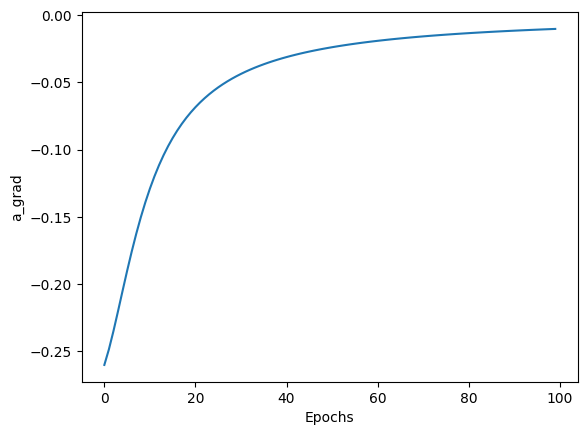

In [33]:
# Visulaize a_grad
#print(a_grad)
plt.plot(a_grad)
plt.xlabel('Epochs')
plt.ylabel('a_grad')
plt.show()

# Building NN

In [34]:
# consider a simple binary classification problem
from sklearn.datasets import make_circles

num_samples = 1000

# Create Circles
X, y = make_circles(num_samples, noise=0.05, random_state=42)

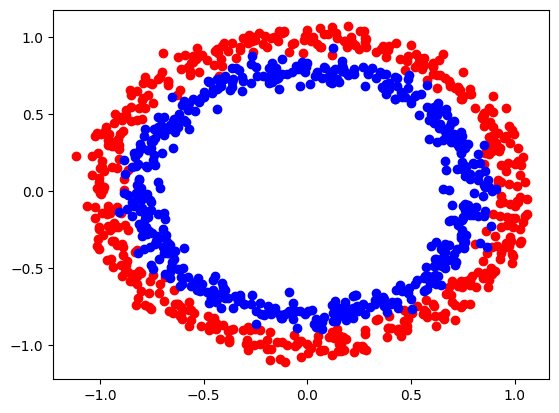

In [35]:
# Visualize X and y
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

## SGD

In [36]:
# Change the data to tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Parameter Initialization
W1 = torch.randn(size=(100, 2), requires_grad=True)
b1 = torch.randn(size=(100, 1), requires_grad=True)
W2 = torch.randn(size=(10, 100), requires_grad=True)
b2 = torch.randn(size=(10, 1), requires_grad=True)
W3 = torch.randn(size=(1, 10), requires_grad=True)
b3 = torch.randn(size=(1, 1), requires_grad=True)
eta = 0.1
loss = []

epochs = 1000

for i in range(epochs):
    # Forward Pass
    a1 = torch.matmul(W1, X[(i,),:].T) + b1 # Used (i,) to retain dim when accessing X
    h1 = torch.sigmoid(a1)
    a2 = torch.matmul(W2, h1) + b2
    h2 = torch.sigmoid(a2)
    a3 = torch.matmul(W3, h2) + b3
    y_hat = torch.sigmoid(a3)
    
    # Compute the loss
    L = torch.pow(y[i] - y_hat, 2)
    loss.append(L.detach().item())
    
    # Backward Pass
    L.backward()
    
    with torch.no_grad():
        W1 -= eta*W1.grad
        b1 -= eta*b1.grad
        W2 -= eta*W2.grad
        b2 -= eta*b2.grad
        W3 -= eta*W3.grad
        b3 -= eta*b3.grad
    
    # Zero the gradients
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

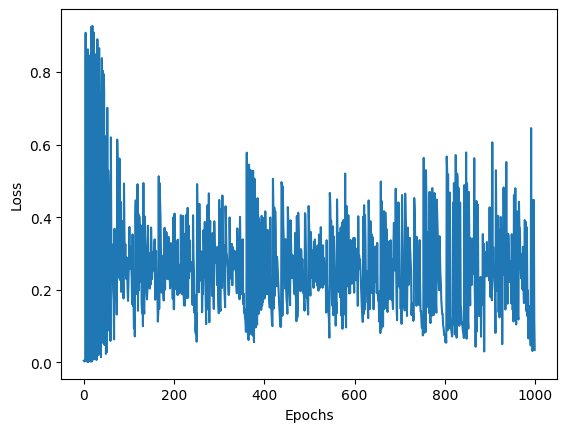

In [37]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Batch GD

In [38]:
# Change the data to tensor
#X = torch.tensor(X, dtype=torch.float32)
#y = torch.tensor(y, dtype=torch.float32)
# Already converted in SGD so commenting

# Parameter Initialization
W1 = torch.randn(size=(10, 2), requires_grad=True)
b1 = torch.randn(size=(10, 1), requires_grad=True)
W2 = torch.randn(size=(5, 10), requires_grad=True)
b2 = torch.randn(size=(5, 1), requires_grad=True)
W3 = torch.randn(size=(1, 5), requires_grad=True)
b3 = torch.randn(size=(1, 1), requires_grad=True)
eta = 0.1
loss = []

epochs = 100

for i in range(epochs):
    
    # Forward Pass
    acc_loss = 0
    for i in range(len(X)):
        a1 = torch.matmul(W1, X[(i,),:].T) + b1 # Used (i,) to retain dim when accessing X
        h1 = torch.sigmoid(a1)
        a2 = torch.matmul(W2, h1) + b2
        h2 = torch.sigmoid(a2)
        a3 = torch.matmul(W3, h2) + b3
        y_hat = torch.sigmoid(a3)
    
        # Compute the loss
        L = (1/len(X)) * torch.pow(y[i] - y_hat, 2)
        acc_loss += L.detach().item()
    
        # Backward Pass
        L.backward() # This will accumulate the gradients
    
    # Total loss
    loss.append(acc_loss)
    
    with torch.no_grad():
        W1 -= eta*W1.grad
        b1 -= eta*b1.grad
        W2 -= eta*W2.grad
        b2 -= eta*b2.grad
        W3 -= eta*W3.grad
        b3 -= eta*b3.grad
    
    # Zero the gradients
    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13340\3871964932.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_13340\3871964932.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


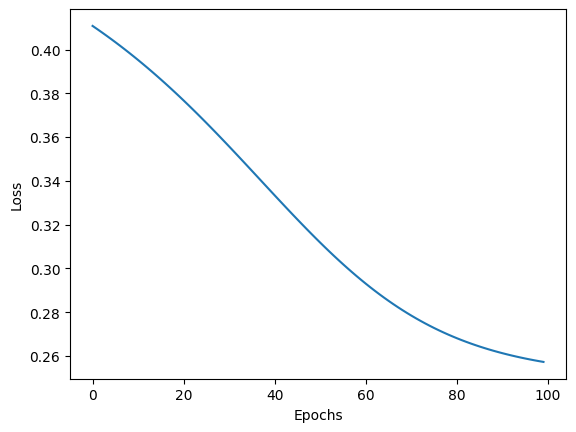

In [39]:
# Clearly batch GD loss is much smoother
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# NN Module

This will take some of the pain away from us

We can create any model using just torch.tensor but when the architecture becomes very complex, it is better to use nn.Module

There are five sections of code

1. Parameter Initializations
2. Forward Propagation
3. Loss function
4. Backprop
5. Optimization

The question is which section(s) can be automated?

We can hide parameter initialization

We can put all of forward propagation in a function/module

Loss function and Backprop is just a single line

We can put all of optimzation in a function/module

In [42]:
# Now, let's see how we can use the nn.Module
# Module in pytorch means laters in other frameworks
# Given the input dim and output dim we can infer the size of parameters
import torch.nn as nn
import torch.nn.functional as F

In [44]:
print(torch)
print(torch.nn)
print(torch.nn.functional)
print(torch.autograd)
# To see the source path

<module 'torch' from 'c:\\Users\\Rishabh\\miniconda3_v1\\envs\\degree_stuff\\lib\\site-packages\\torch\\__init__.py'>
<module 'torch.nn' from 'c:\\Users\\Rishabh\\miniconda3_v1\\envs\\degree_stuff\\lib\\site-packages\\torch\\nn\\__init__.py'>
<module 'torch.nn.functional' from 'c:\\Users\\Rishabh\\miniconda3_v1\\envs\\degree_stuff\\lib\\site-packages\\torch\\nn\\functional.py'>
<module 'torch.autograd' from 'c:\\Users\\Rishabh\\miniconda3_v1\\envs\\degree_stuff\\lib\\site-packages\\torch\\autograd\\__init__.py'>


In [43]:
# A simple linear neuron with parameters w and b
class LinearLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearLayer, self).__init__()
        self.in_dim = input_dim
        self.out_dim = output_dim
        self.w = nn.Parameter(torch.randn(input_dim, output_dim)) # In nn.Parameter, requires_grad is True by default
        self.b = nn.Parameter(torch.randn(output_dim))
    
    def forward(self, x):
        out = torch.matmul(x, self.w) + self.b # nn will take care of backward pass
    
    '''
    What this will do is that it will allow us to use the model as a function, model(x) instead of model.forward(x)
    def __call__(self, x):
        return self.forward(x)
    '''

In [45]:
# Making use of the LinearLayer
model = LinearLayer(100, 10)

In [48]:
# See the methods inherited from nn.Module
#dir(model)

In [52]:
# Let's see the parameters, wow, it is so easy
#list(model.parameters())

## Testing on MNIST dataset

In [53]:
from torchvision import datasets, transforms
# torchvision is a package that consists of popular datasets, model architectures, and common image transformations for computer vision

In [54]:
X = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [55]:
print(X.classes)
print(X.data.shape)
print(X.targets.shape)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])
torch.Size([60000])


In [57]:
# We will only consider the first 1000 samples
x_train, y_train = X.data[:1000], X.targets[:1000]
x_train = x_train.type(torch.float32)

Normalize the input between (0 to 1), that's how NN wants it to be

In [58]:
# For now, we will just divide by max value to normalize
x_train = x_train/x_train.max()

In [59]:
# Now we will use nn simple linear model
model = nn.Linear(in_features=784, out_features=10, bias=True)
print(model)
print(callable(model))

Linear(in_features=784, out_features=10, bias=True)
True


In [60]:
print(issubclass(nn.Linear, nn.Module))

True


In [63]:
# What are the parameters
w, b = model.parameters()
print(w.shape, b.shape)

torch.Size([10, 784]) torch.Size([10])


In [68]:
out = model(x_train[0].reshape(1, 784)) # We need to reshape because the model expects a 2D tensor
out

tensor([[ 0.4155,  0.2466,  0.3397,  0.3048, -0.2393,  0.3676, -0.2554,  0.1821,
          0.0251, -0.6150]], grad_fn=<AddmmBackward0>)

In [69]:
y_hat = torch.softmax(out, dim=1)
y_hat

tensor([[0.1338, 0.1130, 0.1240, 0.1197, 0.0695, 0.1275, 0.0684, 0.1059, 0.0905,
         0.0477]], grad_fn=<SoftmaxBackward0>)

In [70]:
F.softmax(out, dim=1) # Both are same, but pytorch recommends using torch.softmax

tensor([[0.1338, 0.1130, 0.1240, 0.1197, 0.0695, 0.1275, 0.0684, 0.1059, 0.0905,
         0.0477]], grad_fn=<SoftmaxBackward0>)

In [71]:
criterion = nn.CrossEntropyLoss() # Once again the variable "criteria" is a callable function
loss = criterion(y_hat, y_train[0].reshape(1))
loss

tensor(2.2755, grad_fn=<NllLossBackward0>)

# Optimizers

We could have called backprop and computed gradients, but that is sooooo much work

There are a variety of optimization algorithms which subclasses using torch.optim.Optimizer base class

All of them take **model.parameters()** and learning rate as arguments.

Before calling backprop, we have to intiate the optimizer by passing model parameters

In [74]:
import torch.optim as optim
print(optim)

<module 'torch.optim' from 'c:\\Users\\Rishabh\\miniconda3_v1\\envs\\degree_stuff\\lib\\site-packages\\torch\\optim\\__init__.py'>


In [73]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Parameter update

In [75]:
# Call backward to compute the gradients
loss.backward()

In [76]:
import numpy as np

grad = np.array(w.grad.detach())
grad.shape

(10, 784)

Now, visualize the gradient computed for the weights connected to a neuron in the layer.

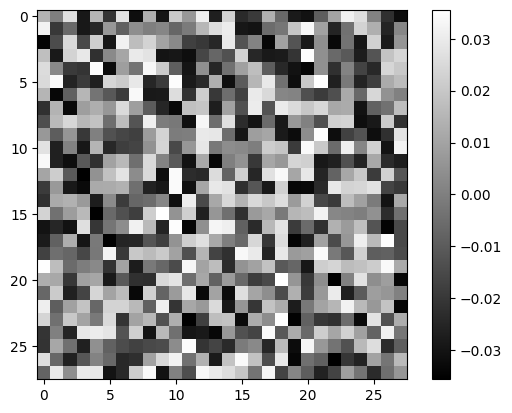

In [77]:
weights = w.detach().numpy()
plt.imshow(weights[1,:].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

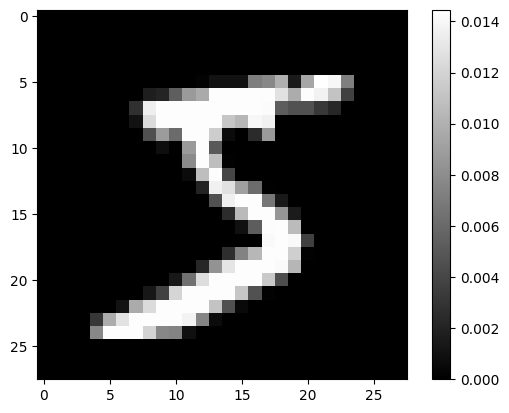

In [78]:
plt.imshow(grad[1,:].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

In [79]:
# Use the accumulated gradients to update the weights
optimizer.step()

In [80]:
# Set the gradients to zero
optimizer.zero_grad()

## Let's build a two layer NN

- Get the data
- Create the DL architecture using nn.Module
- pass the model.parameters() to optimizer
- Compute loss and call loss.backward()
- Call optimizer.step() to update parameters
- Zero the accumulated gradients at the leaf nodes using optim.zero_grad()

- There are two approaches to build NN, if the number of layers are small then we can make use of nn.Sequential() and keep adding layers as follows

In [81]:
model = nn.Sequential(nn.Linear(28 * 28, 20), nn.Sigmoid(), nn.Linear(20, 10), nn.Sigmoid(), nn.Softmax())
# Both nn.Sigmoid() and nn.Softmax() use torch.sigmoid and torch.softmax respectively

In [82]:
model

Sequential(
  (0): Linear(in_features=784, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Softmax(dim=None)
)

- The other clean way of defining the model is subclassing nn.Module and nest the layers in the init method.

In [84]:
class FFN(nn.Module):
    def __init__(self):
        super(FFN, self).__init__()
        self.a1 = nn.Linear(28*28, 20)
        self.a2 = nn.Linear(20, 10)
    
    def forward(self, x):
        h1 = torch.sigmoid(self.a1(x.reshape(-1, 28*28)))
        h2 = torch.sigmoid(self.a2(h1))
        y_hat = F.softmax(h2, dim=1)
        
        return y_hat

In [85]:
model = FFN()
model

FFN(
  (a1): Linear(in_features=784, out_features=20, bias=True)
  (a2): Linear(in_features=20, out_features=10, bias=True)
)

In [93]:
epochs = 100
optimizer = optim.SGD(model.parameters(), lr=0.04) # Initialize the optimizer

In [94]:
def train(x_train, model, optimizer):
    loss_trace = []
    for epoch in range(epochs):
        # Forward Pass
        for i in range(len(x_train)):
            y_hat = model(x_train[i])
            criterion = nn.CrossEntropyLoss()
            loss = criterion(y_hat, y_train[i].reshape(1))
            loss.backward()
        
        loss_trace.append(loss.detach().item())
        if epoch%10 == 0: print(f"Epoch: {epoch}, Loss: {loss.detach().item()}")
        
        # Update Parameters
        optimizer.step()
        optimizer.zero_grad()
    return loss_trace

In [95]:
loss_trace = train(x_train, model, optimizer)

Epoch: 0, Loss: 2.172283172607422
Epoch: 10, Loss: 2.1722567081451416
Epoch: 20, Loss: 2.172229766845703
Epoch: 30, Loss: 2.172205924987793
Epoch: 40, Loss: 2.172184944152832
Epoch: 50, Loss: 2.172166585922241
Epoch: 60, Loss: 2.172149896621704
Epoch: 70, Loss: 2.1721348762512207
Epoch: 80, Loss: 2.172121286392212
Epoch: 90, Loss: 2.1721091270446777


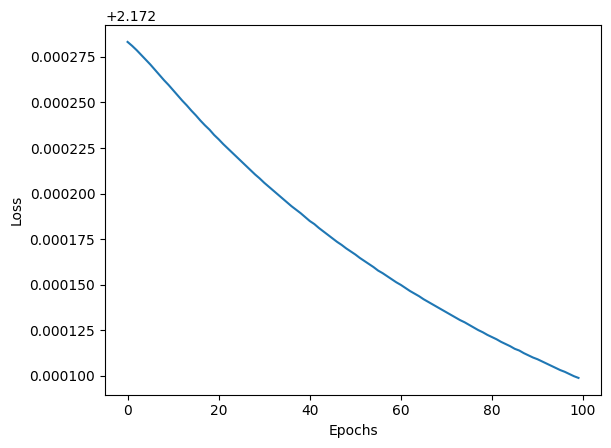

In [96]:
plt.plot(loss_trace)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## TorchData

Data processing is a complex task especially for NLP

It involves multiple tasks

**Map Style Datasets**

We need to inherit the abstract class from torch.utils.data.Dataset and must implement a \_\_getitem\_\_ and \_\_len\_\_ method that returns a single sample from the dataset.

**Iterable Style Datasets**

Suitable for cases where random reads are expensive or even improbable and where batch size depends on the data fetched.

In [118]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Ideally, don't use this on personal computer
#device = torch.device('cpu')

In [105]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA GeForce RTX 4080 Laptop GPU', major=8, minor=9, total_memory=12281MB, multi_processor_count=58)

In [106]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [107]:
# Let us see the available datasets
print(dir(torchvision.datasets))

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'Imagenette', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__',

In [108]:
# Load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [109]:
print(trainset.classes)
print(trainset.data.shape)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)


In [110]:
# Use DataLoader to load the data
trainloader = DataLoader(trainset, batch_size=4, shuffle=True)
testloader = DataLoader(testset, batch_size=4, shuffle=False)

In [111]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [114]:
# Let's display some images
x_train = iter(trainloader)

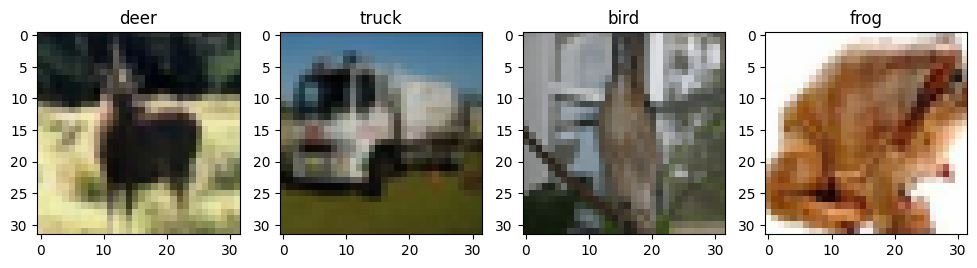

In [116]:
images, labels = next(x_train)

# 4 samples because batch_size is 4
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
i = 0
for image, label in zip(images, labels):
    img = image/2 + 0.5 # Unnormalize
    npimg = img.numpy()
    ax[i].imshow(np.transpose(npimg, (1, 2, 0)))
    ax[i].set_title(classes[label])
    i += 1

Let's create the model

We will use **torch.nn.Conv2d**, **torch.nn.MaxPool2d**, and **torch.nn.Linear**

In [117]:
# Let's create a model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2) # 2x2 kernel, we use the same pool for both conv layers
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [119]:
# Move the model to GPU
model = Net()
model = model.to(device)
model

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [120]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [127]:
for epoch in range(2):
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data
        inputs = inputs.to(device) # Move the data to GPU
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        L = loss(outputs, labels)
        L.backward()
        optimizer.step()
        
        running_loss += L.item()
        class_correct = torch.argmax(outputs, axis=1) == torch.as_tensor(labels)
        running_acc += torch.count_nonzero(class_correct)/4
        if i%2000 == 1999: # Print every 2000 mini-batches
            print(f"Epoch: {epoch+1}, Batch: {i+1}, Loss: {running_loss/2000}, Accuracy: {running_acc/2000}")
            running_loss = 0.0
            running_acc = 0.0

Epoch: 1999, Batch: 2000, Loss: 1.0013268397301436, Accuracy: 0.6473750472068787
Epoch: 3999, Batch: 4000, Loss: 1.0146498670564033, Accuracy: 0.643875002861023
Epoch: 5999, Batch: 6000, Loss: 1.0294715222432278, Accuracy: 0.6353750228881836
Epoch: 7999, Batch: 8000, Loss: 1.025645739206113, Accuracy: 0.6371250152587891
Epoch: 9999, Batch: 10000, Loss: 1.027872988851741, Accuracy: 0.6422500014305115
Epoch: 11999, Batch: 12000, Loss: 1.0131324310656638, Accuracy: 0.6407500505447388
Epoch: 2000, Batch: 2000, Loss: 0.9448394027794711, Accuracy: 0.6708750128746033
Epoch: 4000, Batch: 4000, Loss: 0.9372161039663479, Accuracy: 0.6720000505447388
Epoch: 6000, Batch: 6000, Loss: 0.9551990614677779, Accuracy: 0.6630000472068787
Epoch: 8000, Batch: 8000, Loss: 0.9697662551067769, Accuracy: 0.656000018119812
Epoch: 10000, Batch: 10000, Loss: 0.9688491179281846, Accuracy: 0.6606250405311584
Epoch: 12000, Batch: 12000, Loss: 0.9684483574246988, Accuracy: 0.6641250252723694


In [128]:
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [129]:
test_acc = 0.0
total_sample = 0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    class_correct = torch.argmax(outputs, axis=1) == torch.as_tensor(labels)
    test_acc += torch.count_nonzero(class_correct)
    total_sample += labels.shape[0]

print(f"Test Accuracy: {test_acc/total_sample}")

Test Accuracy: 0.6398999691009521


# Using pre-trained model for classification

# AlexNet

In [126]:
from torchvision import models
# Load the image
from PIL import Image
import requests
from io import BytesIO

In [130]:
alexNet = models.alexnet(pretrained=True)
transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), 
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

c:\Users\Rishabh\miniconda3_v1\envs\degree_stuff\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rishabh\miniconda3_v1\envs\degree_stuff\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Rishabh/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100.0%


In [131]:
alexNet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

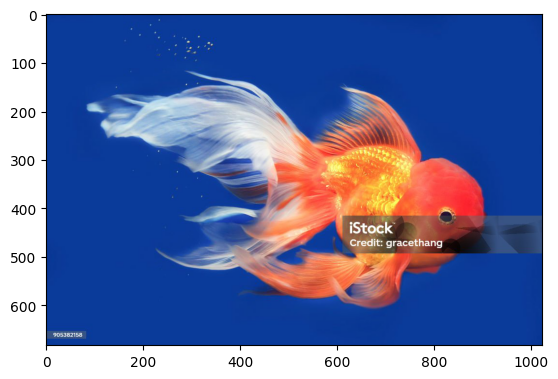

In [134]:
response = requests.get("https://media.istockphoto.com/id/905382158/photo/beautiful-lionhead-goldfish-swimming-in-the-aquarium.jpg?s=1024x1024&w=is&k=20&c=NxKQ9KI3G3CuuKXPzkfmMKcEk3Bd-lZ5cIInhWfLhvo=")
img = Image.open(BytesIO(response.content))
plt.imshow(img)

In [135]:
img_t = transform(img)
batch = torch.unsqueeze(img_t, 0) # Add a batch dimension
alexNet.eval()
pred = alexNet(batch)
pred.shape

torch.Size([1, 1000])

In [137]:
_, index = torch.max(pred, 1)
percentage = torch.nn.functional.softmax(pred, dim=1)[0] * 100
print(percentage[index[0]].item(), index) # Index 1 is goldfish

81.85992431640625 tensor([1])
